# Prototype for Final Year Project (Phishing)

In [1]:
'''imports'''
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
'''to remove warnings'''
import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [3]:
data1 = pd.read_csv('CSV/phishing_dataset_1.csv')

In [4]:
data2 = pd.read_csv('CSV/non_phishing_dataset_13.csv')

In [5]:
frames = [data1, data2]
data = pd.concat(frames)

In [6]:
data

,spamScore,SenderReplyDiff,checkAttachments,subjReply,subjForward,subjNoOfWords,subjNoOfChar,subjVerify,subjDebit,subjBank,...,checkdoubleslash,checkURLShorten,checkImg,checkPort,checkNoDots,avg_DomainLength,checkContentURL,checkModal,check_Here,Phishing
0,4.7,1,0,False,False,7,53,False,False,False,...,1,1,0,1,2.000000,54.000000,1,0,1,1
1,4.9,1,0,False,False,4,23,False,False,False,...,1,1,3,1,1.600000,22.800000,1,1,1,1
2,4.9,1,0,False,False,4,23,False,False,False,...,1,1,3,1,1.600000,22.800000,1,1,1,1
3,4.2,1,0,False,False,4,23,False,False,False,...,1,1,3,1,1.600000,22.800000,1,1,1,1
4,4.2,1,0,False,False,4,23,False,False,False,...,1,1,3,1,1.600000,22.800000,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,2.6,1,0,False,False,1,5,False,False,False,...,1,0,0,1,2.750000,55.125000,1,1,0,0
4302,2.6,1,0,False,False,2,7,False,False,False,...,1,1,0,1,2.000000,63.000000,1,1,1,0
4303,2.4,1,0,False,False,2,6,False,False,False,...,1,1,0,1,1.666667,53.666667,1,1,1,0
4304,0.7,1,0,False,False,3,12,False,False,False,...,1,1,0,1,1.666667,64.666667,1,1,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6722 entries, 0 to 4305
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   spamScore         6722 non-null   float64
 1   SenderReplyDiff   6722 non-null   int64  
 2   checkAttachments  6722 non-null   int64  
 3   subjReply         6722 non-null   bool   
 4   subjForward       6722 non-null   bool   
 5   subjNoOfWords     6722 non-null   int64  
 6   subjNoOfChar      6722 non-null   int64  
 7   subjVerify        6722 non-null   bool   
 8   subjDebit         6722 non-null   bool   
 9   subjBank          6722 non-null   bool   
 10  script_exist      6722 non-null   bool   
 11  checkPopup        6722 non-null   int64  
 12  checkJS           6722 non-null   int64  
 13  NoOnClick         6722 non-null   int64  
 14  html_exist        6722 non-null   bool   
 15  form_exist        6722 non-null   bool   
 16  noFunctionWords   6722 non-null   int64  


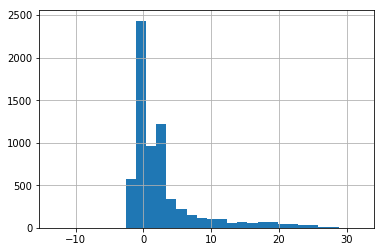

In [8]:
data['spamScore'].hist(bins=30)

In [9]:
data[['subjReply', 'Phishing']].groupby(['subjReply'], as_index=False).mean()

,subjReply,Phishing
0,False,0.455110
1,True,0.044089


In [10]:
data[['check_dear', 'Phishing']].groupby(['check_dear'], as_index=False).mean()

,check_dear,Phishing
0,False,0.247471
1,True,0.723135


In [11]:
data[['check_Here', 'Phishing']].groupby(['check_Here'], as_index=False).mean()

,check_Here,Phishing
0,0,0.730640
1,1,0.302693


In [12]:
data['CatcheckNoDots'] = pd.qcut(data['checkNoDots'], 20, duplicates="drop")
data[['CatcheckNoDots', 'Phishing']].groupby(['CatcheckNoDots'], as_index=False).mean()

,CatcheckNoDots,Phishing
0,"(-0.001, 1.0]",0.212056
1,"(1.0, 1.333]",0.741935
2,"(1.333, 1.963]",0.498534
3,"(1.963, 2.0]",0.602679
4,"(2.0, 3.0]",0.666041
5,"(3.0, 4.0]",0.966019
6,"(4.0, 28.0]",0.973384


In [13]:
data['CatnoOfLinks'] = pd.qcut(data['noOfLinks'], 20, duplicates="drop")
data[['CatnoOfLinks', 'Phishing']].groupby(['CatnoOfLinks'], as_index=False).mean()

,CatnoOfLinks,Phishing
0,"(-0.001, 1.0]",0.271559
1,"(1.0, 2.0]",0.887006
2,"(2.0, 3.0]",0.459318
3,"(3.0, 6.0]",0.862876
4,"(6.0, 17.0]",0.832215
5,"(17.0, 199.0]",0.143713


In [14]:
data['CatnoChars'] = pd.qcut(data['noChars'], 20, duplicates="drop")
data[['CatnoChars', 'Phishing']].groupby(['CatnoChars'], as_index=False).mean()

,CatnoChars,Phishing
0,"(-0.001, 166.0]",0.056213
1,"(166.0, 258.1]",0.044776
2,"(258.1, 394.15]",0.077381
3,"(394.15, 515.2]",0.059524
4,"(515.2, 653.0]",0.084548
5,"(653.0, 801.0]",0.090090
6,"(801.0, 977.35]",0.159639
7,"(977.35, 1204.8]",0.199405
8,"(1204.8, 1442.0]",0.317507
9,"(1442.0, 1851.0]",0.408955


In [15]:
data['catavg_DomainLength'] = pd.qcut(data['avg_DomainLength'], 20, duplicates="drop")
data[['catavg_DomainLength', 'Phishing']].groupby(['catavg_DomainLength'], as_index=False).mean()

,catavg_DomainLength,Phishing
0,"(-0.001, 1.2]",0.104637
1,"(1.2, 23.0]",0.953216
2,"(23.0, 32.333]",0.566735
3,"(32.333, 36.0]",0.860963
4,"(36.0, 42.761]",0.705167
5,"(42.761, 50.211]",0.833333
6,"(50.211, 62.0]",0.739766
7,"(62.0, 74.833]",0.632716
8,"(74.833, 668.0]",0.761905


In [16]:
data['CatRichness'] = pd.qcut(data['Richness'], 20, duplicates="drop")
data[['CatRichness', 'Phishing']].groupby(['CatRichness'], as_index=False).mean()

,CatRichness,Phishing
0,"(-0.001, 0.0132]",0.409496
1,"(0.0132, 0.0423]",0.678571
2,"(0.0423, 0.0668]",0.687500
3,"(0.0668, 0.0792]",0.670623
4,"(0.0792, 0.0872]",0.678571
5,"(0.0872, 0.0934]",0.675595
6,"(0.0934, 0.0974]",0.440476
7,"(0.0974, 0.104]",0.667630
8,"(0.104, 0.112]",0.604294
9,"(0.112, 0.121]",0.589286


In [17]:
data['Catunique_Words'] = pd.qcut(data['unique_Words'], 20, duplicates="drop")
data[['Catunique_Words', 'Phishing']].groupby(['Catunique_Words'], as_index=False).mean()

,Catunique_Words,Phishing
0,"(-0.001, 42.0]",0.063452
1,"(42.0, 47.0]",0.049563
2,"(47.0, 50.0]",0.074919
3,"(50.0, 54.0]",0.081633
4,"(54.0, 57.0]",0.111446
5,"(57.0, 60.0]",0.145161
6,"(60.0, 63.0]",0.174286
7,"(63.0, 66.0]",0.277056
8,"(66.0, 67.0]",0.605000
9,"(67.0, 70.0]",0.337500


In [18]:
data['CatspamScore'] = pd.qcut(data['spamScore'], 20, duplicates="drop")
data[['CatspamScore', 'Phishing']].groupby(['CatspamScore'], as_index=False).mean()

,CatspamScore,Phishing
0,"(-13.100999999999999, -1.7]",0.010504
1,"(-1.7, -1.0]",0.001781
2,"(-1.0, -0.3]",0.011905
3,"(-0.3, -0.1]",0.009434
4,"(-0.1, 0.0]",0.150633
5,"(0.0, 0.4]",0.447552
6,"(0.4, 1.0]",0.365714
7,"(1.0, 1.2]",0.337539
8,"(1.2, 2.0]",0.633721
9,"(2.0, 2.1]",0.079498


# Data Preparation

features_list ['SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar','subjVerify','subjDebit',
                 'subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist','noFunctionWords',
                 'noWords','check_suspend','check_verify','noOfURLs','noOfLinks','checkIP','checkAtSym','checkdoubleslash',
                 'checkURLShorten','checkImg','checkPort']

features_list = ['SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar','subjVerify','subjDebit',
                 'subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist','noFunctionWords',
                 'noWords','noChars','check_suspend','check_verify','check_dear','unique_Words','Richness','noOfURLs','noOfLinks','checkIP','checkAtSym','checkdoubleslash',
                 'checkURLShorten','checkImg','checkPort','checkNoDots','avg_DomainLength','checkContentURL','checkModal','check_Here']

In [19]:
variables = ['spamScore','SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar',
             'subjVerify','subjDebit','subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist',
             'noFunctionWords', 'noWords','noChars','check_suspend','check_verify','check_dear','unique_Words','Richness',
             'noOfURLs','noOfLinks','checkIP','checkAtSym','checkdoubleslash', 'checkURLShorten','checkImg','checkPort','avg_DomainLength',
             'checkNoDots','checkContentURL','checkModal','check_Here']

X = data[variables]
y = data['Phishing']

In [20]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X.subjReply = enc.fit_transform(X.subjReply.values.reshape(-1,1))
X.subjForward = enc.fit_transform(X.subjForward.values.reshape(-1,1))
X.subjVerify = enc.fit_transform(X.subjVerify.values.reshape(-1,1))
X.subjDebit = enc.fit_transform(X.subjDebit.values.reshape(-1,1))
X.subjBank = enc.fit_transform(X.subjBank.values.reshape(-1,1))
X.script_exist = enc.fit_transform(X.script_exist.values.reshape(-1,1))
X.check_suspend = enc.fit_transform(X.check_suspend.values.reshape(-1,1))
X.check_verify = enc.fit_transform(X.check_verify.values.reshape(-1,1))
X.check_dear = enc.fit_transform(X.check_dear.values.reshape(-1,1))
#X.html_exist = enc.fit_transform(X.html_exist.values.reshape(-1,1))
#X.form_exist = enc.fit_transform(X.form_exist.values.reshape(-1,1))

In [21]:
X.head()

,spamScore,SenderReplyDiff,checkAttachments,subjReply,subjForward,subjNoOfWords,subjNoOfChar,subjVerify,subjDebit,subjBank,...,checkAtSym,checkdoubleslash,checkURLShorten,checkImg,checkPort,avg_DomainLength,checkNoDots,checkContentURL,checkModal,check_Here
0,4.7,1,0,0.0,0.0,7,53,0.0,0.0,0.0,...,0,1,1,0,1,54.0,2.0,1,0,1
1,4.9,1,0,0.0,0.0,4,23,0.0,0.0,0.0,...,0,1,1,3,1,22.8,1.6,1,1,1
2,4.9,1,0,0.0,0.0,4,23,0.0,0.0,0.0,...,0,1,1,3,1,22.8,1.6,1,1,1
3,4.2,1,0,0.0,0.0,4,23,0.0,0.0,0.0,...,0,1,1,3,1,22.8,1.6,1,1,1
4,4.2,1,0,0.0,0.0,4,23,0.0,0.0,0.0,...,0,1,1,3,1,22.8,1.6,1,1,1


In [22]:
'''X.loc[ X['spamScore'] <= 4, 'checkSpam'] = 0
X.loc[ X['spamScore'] > 4, 'checkSpam'] = 1'''

"X.loc[ X['spamScore'] <= 4, 'checkSpam'] = 0\nX.loc[ X['spamScore'] > 4, 'checkSpam'] = 1"

In [23]:
X.loc[ X['spamScore'] <= 0, 'spamScore'] = 0
X.loc[(X['spamScore'] > 0)  & (X['spamScore'] <= 4.5), 'spamScore'] = 1
X.loc[ X['spamScore'] > 4.5, 'spamScore'] = 2

In [24]:
X.loc[ X['noOfURLs'] <= 1, 'noOfURLs'] = 0
X.loc[(X['noOfURLs'] > 1)  & (X['noOfURLs'] <= 4), 'noOfURLs'] = 1
X.loc[(X['noOfURLs'] > 4)  & (X['noOfURLs'] <= 13), 'noOfURLs'] = 2
X.loc[ X['noOfURLs'] > 13, 'noOfURLs'] = 3

In [25]:
X.loc[ X['noOfLinks'] <= 1, 'noOfLinks'] = 0
X.loc[(X['noOfLinks'] > 1)  & (X['noOfLinks'] <= 14), 'noOfLinks'] = 1
X.loc[ X['noOfLinks'] > 14, 'noOfLinks'] = 2

In [26]:
X.loc[ X['subjNoOfWords'] <= 3, 'subjNoOfWords'] = 0
X.loc[(X['subjNoOfWords'] > 3)  & (X['subjNoOfWords'] <= 6), 'subjNoOfWords'] = 1
X.loc[(X['subjNoOfWords'] > 6)  & (X['subjNoOfWords'] <= 10), 'subjNoOfWords'] = 2
X.loc[ X['subjNoOfWords'] > 10, 'subjNoOfWords'] = 3

In [27]:
X.loc[ X['checkNoDots'] <= 1, 'checkNoDots'] = 0
X.loc[(X['checkNoDots'] > 1)  & (X['checkNoDots'] < 2), 'checkNoDots'] = 1
X.loc[ X['checkNoDots'] == 2, 'checkNoDots'] = 2
X.loc[(X['checkNoDots'] > 2)  & (X['checkNoDots'] <= 3), 'checkNoDots'] = 3
X.loc[ X['checkNoDots'] > 3, 'checkNoDots'] = 4

In [28]:
X.loc[ X['noChars'] <= 954, 'noChars'] = 0
X.loc[(X['noChars'] > 954)  & (X['noChars'] <= 1661), 'noChars'] = 1
X.loc[(X['noChars'] > 1661)  & (X['noChars'] <= 5839), 'noChars'] = 2
X.loc[(X['noChars'] > 5839)  & (X['noChars'] <= 6920), 'noChars'] = 3
X.loc[ X['noChars'] > 6920, 'noChars'] = 4

In [29]:
X.loc[ X['avg_DomainLength'] <= 35, 'avg_DomainLength'] = 0
X.loc[ X['avg_DomainLength'] > 35, 'avg_DomainLength'] = 1

In [30]:
X.loc[ X['subjNoOfChar'] <= 20, 'subjNoOfChar'] = 0
X.loc[(X['subjNoOfChar'] > 20)  & (X['subjNoOfChar'] <= 30), 'subjNoOfChar'] = 1
X.loc[(X['subjNoOfChar'] > 30)  & (X['subjNoOfChar'] <= 45), 'subjNoOfChar'] = 2
X.loc[ X['subjNoOfChar'] > 45, 'subjNoOfChar'] = 3

In [31]:
X.loc[ X['noWords'] <= 207, 'noWords'] = 0
X.loc[(X['noWords'] > 207), 'noWords'] = 1

In [32]:
X.loc[X['unique_Words'] <= 61, 'unique_Words'] = 0
X.loc[(X['unique_Words'] > 61) & (X['unique_Words'] <= 78), 'unique_Words'] = 1
X.loc[X['unique_Words'] > 78, 'unique_Words'] = 2

In [33]:
X.loc[ X['noFunctionWords'] <= 1, 'noFunctionWords'] = 0
X.loc[(X['noFunctionWords'] > 1)  & (X['noFunctionWords'] <= 3), 'noFunctionWords'] = 1
X.loc[(X['noFunctionWords'] > 3)  & (X['noFunctionWords'] <= 16), 'noFunctionWords'] = 2
X.loc[(X['noFunctionWords'] > 16)  & (X['noFunctionWords'] <= 26), 'noFunctionWords'] = 3
X.loc[(X['noFunctionWords'] > 26), 'noFunctionWords'] = 4

In [34]:
X.loc[ X['Richness'] <= 0.0736, 'Richness'] = 0
X.loc[(X['Richness'] > 0.0736)  & (X['Richness'] <= 0.118), 'Richness'] = 1
X.loc[(X['Richness'] > 0.118)  & (X['Richness'] <= 0.133), 'Richness'] = 2
X.loc[(X['Richness'] > 0.133)  & (X['Richness'] <= 0.15), 'Richness'] = 3
X.loc[ X['Richness'] > 0.15, 'Richness'] = 4

In [35]:
X.loc[ X['checkImg'] <= 0, 'checkImg'] = 0
X.loc[(X['checkImg'] > 0), 'checkImg'] = 1

In [36]:
X.loc[ X['NoOnClick'] <= 0, 'NoOnClick'] = 0
X.loc[(X['NoOnClick'] > 0), 'NoOnClick'] = 1

In [37]:
X.head()

,spamScore,SenderReplyDiff,checkAttachments,subjReply,subjForward,subjNoOfWords,subjNoOfChar,subjVerify,subjDebit,subjBank,...,checkAtSym,checkdoubleslash,checkURLShorten,checkImg,checkPort,avg_DomainLength,checkNoDots,checkContentURL,checkModal,check_Here
0,2.0,1,0,0.0,0.0,2,3,0.0,0.0,0.0,...,0,1,1,0,1,1.0,2.0,1,0,1
1,2.0,1,0,0.0,0.0,1,1,0.0,0.0,0.0,...,0,1,1,1,1,0.0,1.0,1,1,1
2,2.0,1,0,0.0,0.0,1,1,0.0,0.0,0.0,...,0,1,1,1,1,0.0,1.0,1,1,1
3,1.0,1,0,0.0,0.0,1,1,0.0,0.0,0.0,...,0,1,1,1,1,0.0,1.0,1,1,1
4,1.0,1,0,0.0,0.0,1,1,0.0,0.0,0.0,...,0,1,1,1,1,0.0,1.0,1,1,1


In [38]:
xd = ['script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist',
             'noFunctionWords', 'noWords','noChars','check_suspend','check_verify','check_dear','unique_Words','Richness',
             'noOfURLs','noOfLinks']
Z = X[xd]
Z.head()

,script_exist,checkPopup,checkJS,NoOnClick,html_exist,form_exist,noFunctionWords,noWords,noChars,check_suspend,check_verify,check_dear,unique_Words,Richness,noOfURLs,noOfLinks
0,0.0,0,0,0,True,False,0,1,2,0.0,0.0,1.0,2,4.0,0,0
1,0.0,0,0,0,True,False,2,1,4,0.0,0.0,0.0,2,0.0,2,1
2,0.0,0,0,0,True,False,2,1,4,0.0,0.0,0.0,2,0.0,2,1
3,0.0,0,0,0,True,False,2,1,4,0.0,0.0,0.0,2,0.0,2,1
4,0.0,0,0,0,True,False,2,1,4,0.0,0.0,0.0,2,0.0,2,1


# Training and Saving the Model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [40]:
learning = [0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3]
n_estimate = [100,150,200,250,300,350,400,450,500,550,600]

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

for x in range(0,len(learning)):
    for y in range(0,len(n_estimate)):
        model = GradientBoostingClassifier(learning_rate=learning[x], n_estimators=n_estimate[y])
        model.fit(X_train, y_train)

        y_hat = model.predict(X_test)
        print("Accuracy for learning_rate > {} >".format(learning[x]), "n_estimators > {} >".format(n_estimate[y]), " :", accuracy_score(y_test, y_hat))

Accuracy for learning_rate > 0.1 > n_estimators > 100 >  : 0.9450222882615156
Accuracy for learning_rate > 0.1 > n_estimators > 150 >  : 0.9598811292719168
Accuracy for learning_rate > 0.1 > n_estimators > 200 >  : 0.962852897473997
Accuracy for learning_rate > 0.1 > n_estimators > 250 >  : 0.9598811292719168
Accuracy for learning_rate > 0.1 > n_estimators > 300 >  : 0.9643387815750372
Accuracy for learning_rate > 0.1 > n_estimators > 350 >  : 0.9643387815750372
Accuracy for learning_rate > 0.1 > n_estimators > 400 >  : 0.962852897473997
Accuracy for learning_rate > 0.1 > n_estimators > 450 >  : 0.9658246656760773
Accuracy for learning_rate > 0.1 > n_estimators > 500 >  : 0.962852897473997
Accuracy for learning_rate > 0.1 > n_estimators > 550 >  : 0.962852897473997
Accuracy for learning_rate > 0.1 > n_estimators > 600 >  : 0.9643387815750372
Accuracy for learning_rate > 0.125 > n_estimators > 100 >  : 0.9598811292719168
Accuracy for learning_rate > 0.125 > n_estimators > 150 >  : 0.956

In [41]:
'''n_estimate = [10,15,20,25,30,35,40,45,50,55,60]

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

for y in range(0,len(n_estimate)):
    model = BaggingClassifier(n_estimators=n_estimate[y])
    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_test)
    print("Accuracy for n_estimators > {} >".format(n_estimate[y]), " :", accuracy_score(y_test, y_hat))'''

'n_estimate = [10,15,20,25,30,35,40,45,50,55,60]\n\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.metrics import accuracy_score\n\nfor y in range(0,len(n_estimate)):\n    model = BaggingClassifier(n_estimators=n_estimate[y])\n    model.fit(X_train, y_train)\n    \n    y_hat = model.predict(X_test)\n    print("Accuracy for n_estimators > {} >".format(n_estimate[y]), " :", accuracy_score(y_test, y_hat))'

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
'''from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators=20)
model.fit(X_train, y_train)'''

'from sklearn.ensemble import BaggingClassifier\nmodel = BaggingClassifier(n_estimators=20)\nmodel.fit(X_train, y_train)'

In [44]:
'''Saving and then loading the model using pickle'''
import pickle
#ickle.dump(model, open("phishing_trained_model_6.p", "wb"))
model = pickle.load(open("phishing_trained_model_6.p", "rb"))

# Feature Importance

In [45]:
y_hat = model.predict(X_test)

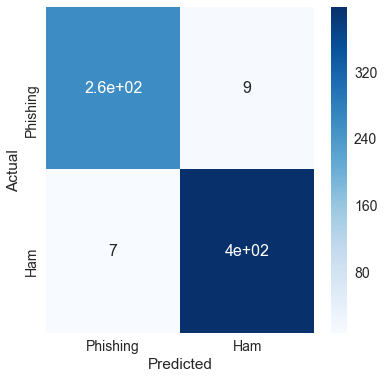

In [46]:
'''Printing of confusion matrix'''
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Phishing","Ham"]
'''Create confusion matrix'''
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,6))
sns.set(font_scale=1.4)#for label size
'''View data with seaborn heatmap'''
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [47]:
'''Printing of accuracy score'''
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_hat))

Accuracy:  0.9762258543833581


In [48]:
features_list = ['spamScore','SenderReplyDiff','checkAttachments','subjReply','subjForward','subjNoOfWords','subjNoOfChar',
             'subjVerify','subjDebit','subjBank','script_exist','checkPopup','checkJS','NoOnClick','html_exist','form_exist',
             'noFunctionWords', 'noWords','noChars','check_suspend','check_verify','check_dear','unique_Words','Richness',
             'noOfURLs','noOfLinks','checkIP','checkAtSym','checkdoubleslash', 'checkURLShorten','checkImg','checkPort','avg_DomainLength',
             'checkNoDots','checkContentURL','checkModal','check_Here']

In [49]:
feature = model.feature_importances_
ranking = np.argsort(-model.feature_importances_[:40])
for x in range(0,len(features_list)):
    y = ranking[x]
    print("{}".format(features_list[y]),": {}".format(feature[y]*100))

spamScore : 46.30585964871759
noFunctionWords : 9.021831334805293
subjReply : 8.77697131146661
noOfLinks : 7.038180666867529
Richness : 6.727251532943418
noChars : 3.0536599201098804
checkNoDots : 2.7051689874077405
check_dear : 2.505427008606873
avg_DomainLength : 1.9191409403641626
check_Here : 1.9011079598157665
noOfURLs : 1.5855749437572046
checkImg : 1.5753049564082455
SenderReplyDiff : 1.3740761397940562
unique_Words : 0.9872733040684647
checkAttachments : 0.9504669598312568
subjNoOfWords : 0.6652885442359969
checkAtSym : 0.6276129268731893
subjNoOfChar : 0.490206416066976
checkModal : 0.35810619968798924
check_verify : 0.32314055562001703
noWords : 0.23070305418415576
subjBank : 0.15806678827974172
html_exist : 0.1455104106260843
checkContentURL : 0.14509124272873766
checkURLShorten : 0.10975665260969368
checkJS : 0.07265706047814739
subjVerify : 0.05736509998109243
checkdoubleslash : 0.047924346946481865
checkPort : 0.03974328511661916
form_exist : 0.03919917940481691
check_sus

Ideas of Methods Flag could be Distributed:
- Replying to the email that sends a false positive or false negative with flag
- Using a form that only gives flag if the two AIs give different results (false negative, false positive)